# 第1-6课：绘制箱线图、饼图和直方图

它能显示出一组数据的上限、下限、中位数及上下四分位数。

中位数：由矩形箱子中的线表示。中位数常用于度量数据的中心，一半观测值小于等于该值，而另一半则大于等于该值。
四分位间距框：四分位间距框表示中间 50% 的数据，即上图中的矩形框，它的上下边之间的距离表示“上四分位数 Q3”和“下四分位数 Q1”的差（Q3-Q1）。
须和上限、下限：由矩形框向两侧延伸的线段，线段的终点分别称为“上限”和“下限”。
异常值：超出“上限”和“下限”范围的值。

四分位数等于与该位置两侧的两个整数的加权平均数，此权重取决于相对两侧整数的距离远近，距离越近，权重越大，距离越远，权重越小，权数之和等于 1。

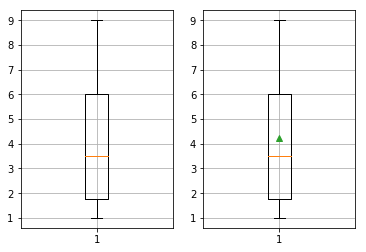

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 2)
data = [1, 5, 9, 2]
ax[0].boxplot([data]) 
ax[0].grid(True)
ax[1].boxplot([data], showmeans=True)    # 显示平均值
ax[1].grid(True)

In [2]:
import numpy as np
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)   
data = [collectn_1, collectn_2, collectn_3, collectn_4]


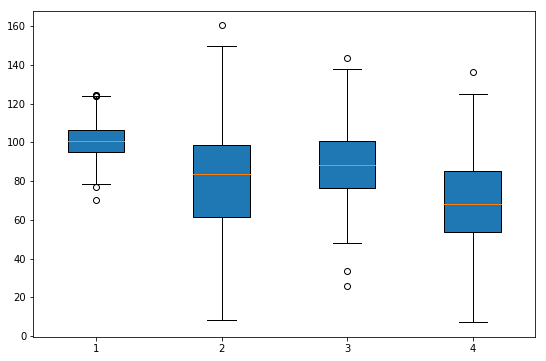

In [4]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)    #①

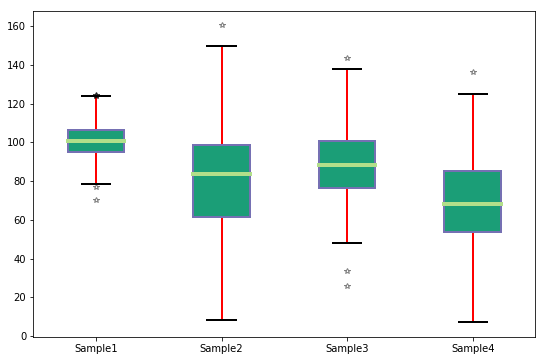

In [5]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)
# 修改矩形框内的填充色和矩形框的边线
for box in bp['boxes']:
    box.set( color='#7570b3', linewidth=2)    # 矩形框边线颜色和粗细
    box.set( facecolor = '#1b9e77' )    # 填充色

# 须线的粗细和颜色
for whisker in bp['whiskers']:
    whisker.set(color='red', linewidth=2)

# 表示上下限的线的颜色和粗细
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

# 表示中位数的的线的颜色和粗细
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=4)

# 表示离群值的符号设置
for flier in bp['fliers']:
    flier.set(marker='*', color='#e7298a', alpha=0.5)

# 设置坐标轴
ax.set_xticklabels(['Sample1', 'Sample2', 'Sample3', 'Sample4'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

变量 bp 引用的对象是字典对象，其中包含（以下各项其实都是对象）：

boxes，箱线图的矩形框
whiskers，箱线图的须线，即从矩形框开始向两侧延伸的线段
medians，表示中位数的线段
caps，表示上、下限的线段
fliers，表示离群值的符号
means，表示平均值的符号

In [6]:
import pandas as pd
import numpy as np
data = np.random.randn(25, 4)
df = pd.DataFrame(data, columns=list('ABCD'))
df.head()

,A,B,C,D
0,0.021043,0.156372,1.037654,0.045666
1,1.107336,-1.337789,-0.253667,1.254880
2,-0.080545,-1.220842,-1.155926,-0.757340
3,-1.312391,0.495349,-2.815061,-0.821378
4,-1.390651,-1.373243,-0.569552,-1.234933


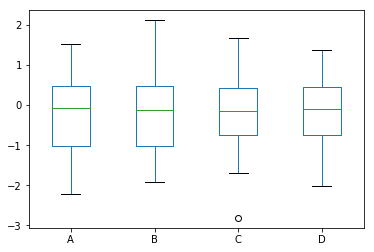

In [7]:
ax = df.plot.box()

#饼图是用来表示数据中各项的代销占总数的比例。在 Matplotlib 中，pie 是用来绘制饼图的方法（函数）。

[Text(0.5, 1.0, 'Pie'), None]

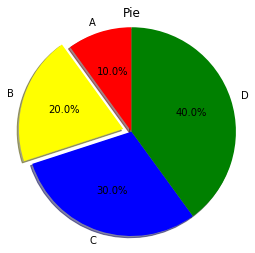

In [9]:
x = [2, 4, 6 ,8]
fig, ax = plt.subplots()
labels = ['A', 'B', 'C', 'D']
colors = ['red', 'yellow', 'blue', 'green']
explode = (0, 0.1, 0, 0)
ax.pie(x, explode=explode, labels=labels, 
       colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, radius=1.2) 
ax.set(aspect="equal", title='Pie')

In [10]:
# 此代码中 ax.pie 的各个参数。

# x：毫无疑问，是数据。
# explode：“扇面”的偏离。饼图一个“圆饼”，被分成了 4 个“扇面”，explode 中第二个数 0.1，对应 B“扇面”偏离 0.1，其他为零，即不偏离。
# labels：为每个“扇面”设置标示。
# colors：为每个“扇面”设置颜色。
# autopct：按照规定格式在每个“扇面”上显示百分比。
# shadow：是否有阴影。
# startangle：第一个“扇形”开始的角度，然后默认依逆时针旋转。
# radius：半径大小。


Text(0.5, 1.0, '频数/频率分布直方图')

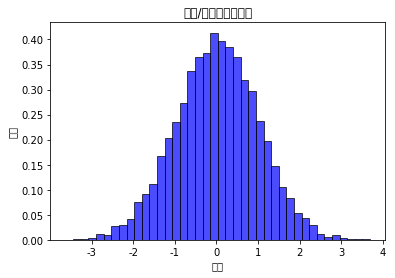

In [11]:
import matplotlib 
matplotlib.rcParams['axes.unicode_minus']=False # ③

data = np.random.randn(10000)    # ④
plt.hist(data, bins=40, density=True, facecolor="blue", edgecolor="black", alpha=0.7) 
plt.xlabel("区间") 
plt.ylabel("频率") 
plt.title("频数/频率分布直方图")

plt.hist 语句中的参数含义如下。

data：必选参数，绘图数据。
bins：这个参数的赋值比较多样化。
如果是整数，则表示直方图中矩形数目，即组距（小区间）的数目。
如果是数列，比如 [1,2,3,4,5]，则表示直方图中矩形左右边界（即组距的左右边界，组限）是 [1, 2), [2, 3), [3, 4), [4, 5]，即组距数目为 4（矩形数量为 4）。
density=True：本例中如此设置，则所得直方图表示的归一化后的频率（概率密度），即直方图下的面积总和为 1；如果不设置，则显示的是频数，没有归一化。
facecolor：直方图中矩形的颜色。
edgecolor：矩形边的颜色。
alpha：图像透明度。


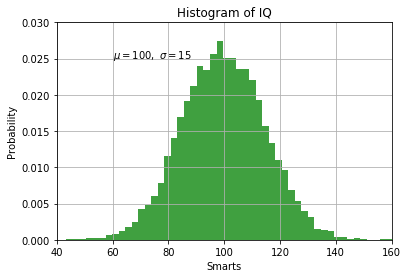

In [12]:
np.random.seed(19680801)

mu, sigma = 100, 15    # 分别表示平均数和标准差
x = mu + sigma * np.random.randn(10000)

# 绘制直方图，并得到返回值
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)    # ⑧

# 设置坐标系
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

(0.0, 80.0)

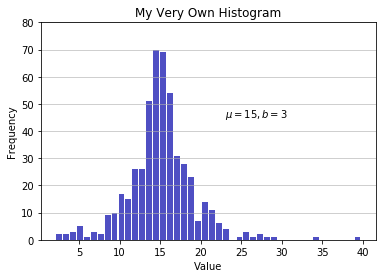

In [13]:
# 拉普拉斯分布
np.random.seed(444)
d = np.random.laplace(loc=15, scale=3, size=500)
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [14]:
means = 10, 20
stdevs = 4, 2
dist = pd.DataFrame(np.random.normal(loc=means, scale=stdevs, size=(1000, 2)), columns=['a', 'b'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)


,a,b
min,-2.93,14.40
max,22.58,27.08
mean,9.58,19.93
std,4.18,1.92


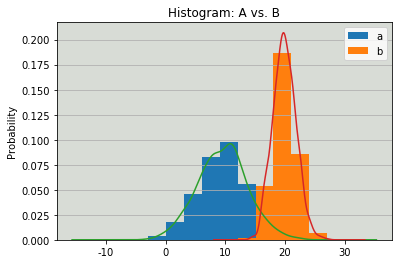

In [15]:
fig, ax = plt.subplots()
dist.plot.hist(density=True, ax=ax)    # ⑨
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')    # ⑩

ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')